# Problem Statement:
### Given the e-commerce data, use k-means clustering algorithm to cluster customers with similar interest.
#### BY - Anubhav Gupta - 2010990096

In [1]:
# Using KMeans Clustring Algorithm

## Importing Dependencies

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from warnings import filterwarnings
filterwarnings('ignore')
import time

## Reading Dataset

In [3]:
start = time.time()
data = pd.read_excel('cust_data.xlsx')
print(time.time() - start)

11.387035846710205


In [4]:
data.head(10)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
5,6,F,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,7,F,6,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
7,8,M,9,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,F,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
data.dtypes

Cust_ID                    int64
Gender                    object
Orders                     int64
Jordan                     int64
Gatorade                   int64
Samsung                    int64
Asus                       int64
Udis                       int64
Mondelez International     int64
Wrangler                   int64
Vans                       int64
Fila                       int64
Brooks                     int64
H&M                        int64
Dairy Queen                int64
Fendi                      int64
Hewlett Packard            int64
Pladis                     int64
Asics                      int64
Siemens                    int64
J.M. Smucker               int64
Pop Chips                  int64
Juniper                    int64
Huawei                     int64
Compaq                     int64
IBM                        int64
Burberry                   int64
Mi                         int64
LG                         int64
Dior                       int64
Scabal    

In [6]:
data.shape

(30000, 38)

In [7]:
data.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [8]:
data = data.fillna(method='ffill')

In [9]:
data.isna().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

In [10]:
data.head(10)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,F,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
5,6,F,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,7,F,6,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
7,8,M,9,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,F,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Converting Gender into Binary

In [11]:
def gender_numeric(x):
    return 1 if x == 'M' else 0

data['Gender'] = data['Gender'].apply(gender_numeric)

In [12]:
data['Gender'].value_counts()

0    24267
1     5733
Name: Gender, dtype: int64

In [13]:
data.head(10)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,1,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
5,6,0,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,7,0,6,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
7,8,1,9,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [14]:
X = data.iloc[: , 2:]

In [15]:
X

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Standardising For Optimal Results

In [22]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

## Elbow Method

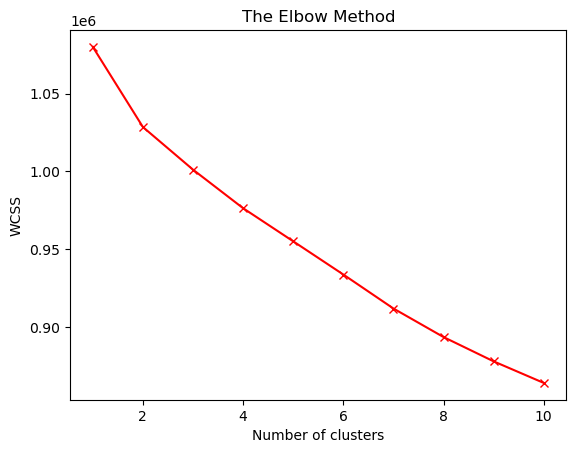

14.612272024154663


In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
start = time.time()
wcss = []
for i in range(1, 11):
    kmean = KMeans(n_clusters = i, random_state = 42)
    kmean.fit(X_scaled)
    wcss.append(kmean.inertia_)
plt.plot(range(1, 11), wcss, 'rx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
print(time.time() - start)

## Silhoutte Method

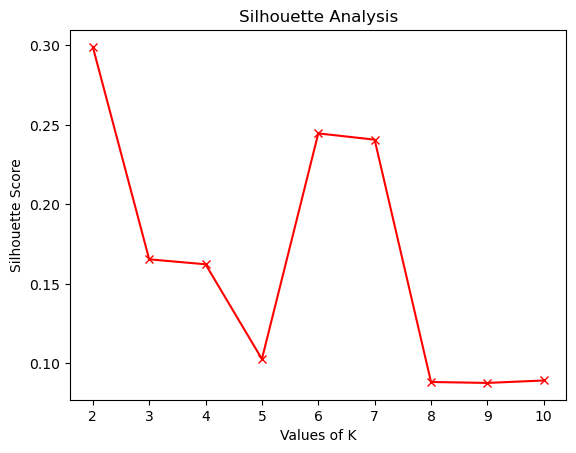

92.27626848220825


In [24]:
start = time.time()
silhouette_avg = []
for i in range(2, 11):
    kmean = KMeans(n_clusters = i, random_state = 42)
    kmean.fit(X_scaled)
    silhouette_avg.append(silhouette_score(X, kmean.labels_))
plt.plot(range(2, 11), silhouette_avg, 'rx-')
plt.title('Silhouette Analysis')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.show()
print(time.time() - start)

## Applying ALgorithm

In [25]:
kmeans = KMeans(n_clusters=2, random_state=42,)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

In [26]:
y_prd = kmeans.fit_predict(X_scaled)

In [27]:
y_prd

array([1, 0, 1, ..., 1, 1, 1])